In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

df = pd.read_csv('heart.csv')
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [ ]:
df.shape
df.info()

df.describe()

df['target'].value_counts()
df['target'].value_counts(normalize=True)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Variable Name	Role	Type	Demographic	Description	Units	Missing Values

age	Feature	Integer	Age		years	no

sex	Feature	Categorical	Sex			no

cp	Feature	Categorical				no

trestbps	Feature	Integer		resting blood pressure (on admission to the hospital)	mm Hg	no

chol	Feature	Integer		serum cholestoral	mg/dl	no

fbs	Feature	Categorical		fasting blood sugar > 120 mg/dl		no

restecg	Feature	Categorical				no

thalach	Feature	Integer		maximum heart rate achieved		no

exang	Feature	Categorical		exercise induced angina		no

oldpeak	Feature	Integer		ST depression induced by exercise relative to rest

slope	Feature	Categorical				no

ca	Feature	Integer		number of major vessels (0-3) colored by flourosopy		yes

thal	Feature	Categorical				yes

num	Target	Integer		diagnosis of heart disease		no

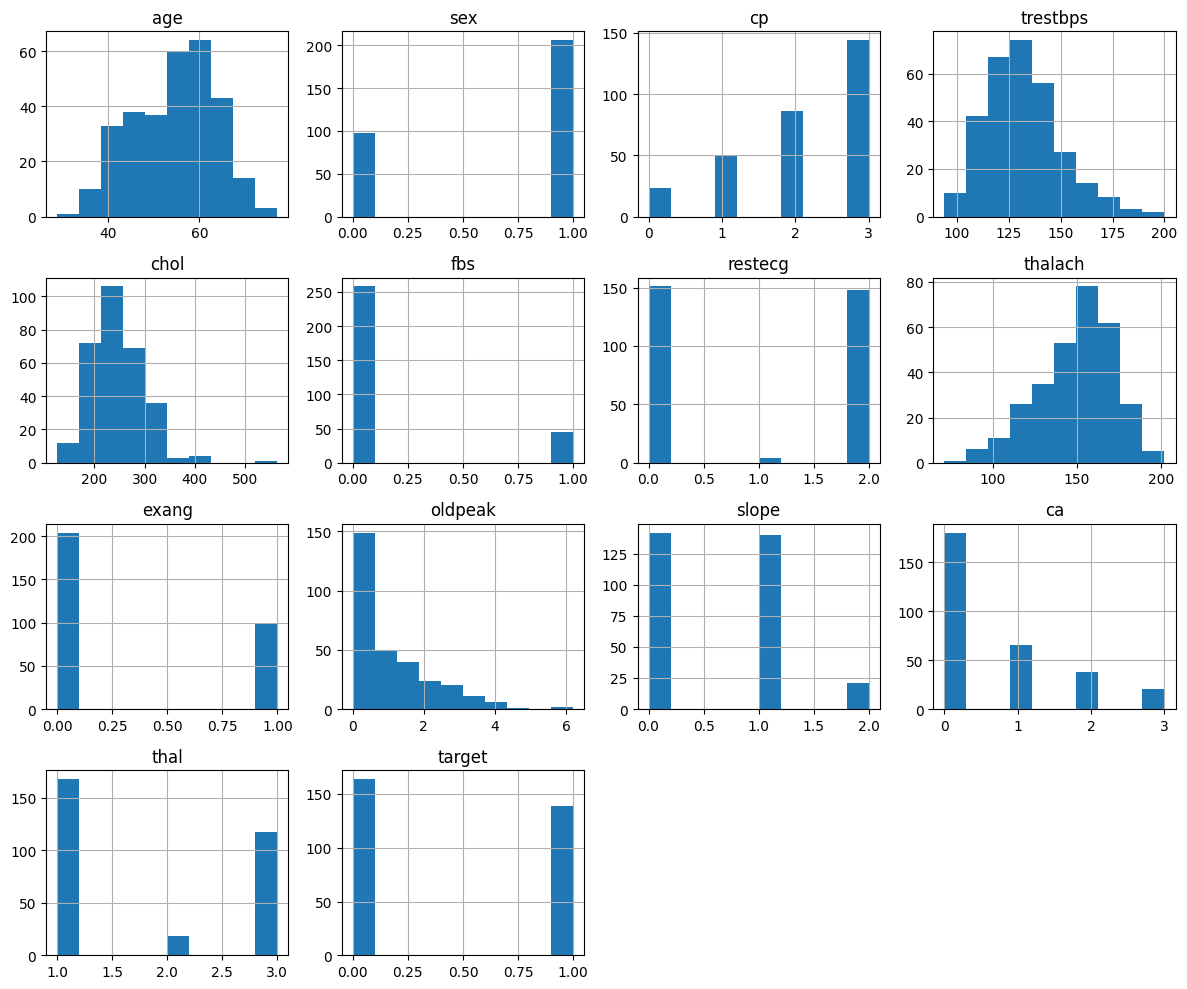

In [ ]:
df.hist(figsize=(12,10))
plt.tight_layout()

In [ ]:
cols = df.columns
cols = [c for c in cols if c != 'target']   # exclude target if needed

n = len(cols)
rows = math.ceil(n / 3)   # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(18, 5*rows))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.boxenplot(x='target', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs target')

# Hide unused subplots
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("combined_boxenplots.png", dpi=300)
plt.close()

In [ ]:
pd.crosstab(df['sex'], df['target'], normalize='columns') # mostly man with heart disease


target,0,1
sex,,
0,0.439024,0.179856
1,0.560976,0.820144


In [ ]:
pd.crosstab(df['cp'], df['target'], normalize='index') # mostly pain level 3 and some pain level 2

target,0,1
cp,,
0,0.695652,0.304348
1,0.820000,0.180000
2,0.790698,0.209302
3,0.270833,0.729167


In [ ]:
pd.crosstab(df['fbs'], df['target']) # weak feature

target,0,1
fbs,,
0,141,117
1,23,22


In [ ]:
df.groupby('target')['thalach'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,164.0,158.378049,19.199080,96.0,148.75,161.0,172.0,202.0
1,139.0,139.258993,22.593233,71.0,125.00,142.0,156.5,195.0


In [ ]:
pd.crosstab(df['exang'], df['target'], normalize='index')

target,0,1
exang,,
0,0.691176,0.308824
1,0.232323,0.767677


In [ ]:
df.groupby('target')['oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,164.0,0.586585,0.781734,0.0,0.00,0.2,1.025,4.2
1,139.0,1.574101,1.302580,0.0,0.55,1.4,2.500,6.2


In [ ]:
df.groupby('target')['slope'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,164.0,0.408537,0.594598,0.0,0.0,0.0,1.0,2.0
1,139.0,0.827338,0.563736,0.0,0.0,1.0,1.0,2.0


In [ ]:
pd.crosstab(df['ca'], df['target'], normalize='index') # higher value more potential

target,0,1
ca,,
0,0.738889,0.261111
1,0.323077,0.676923
2,0.184211,0.815789
3,0.150000,0.850000


Some features are strong predictors of heart disease:
cp, thalach, oldpeak, ca, thal

Some features are moderately helpful:
age, sex, exang, slope

Some features provide little information:
trestbps, chol, fbs, restecg

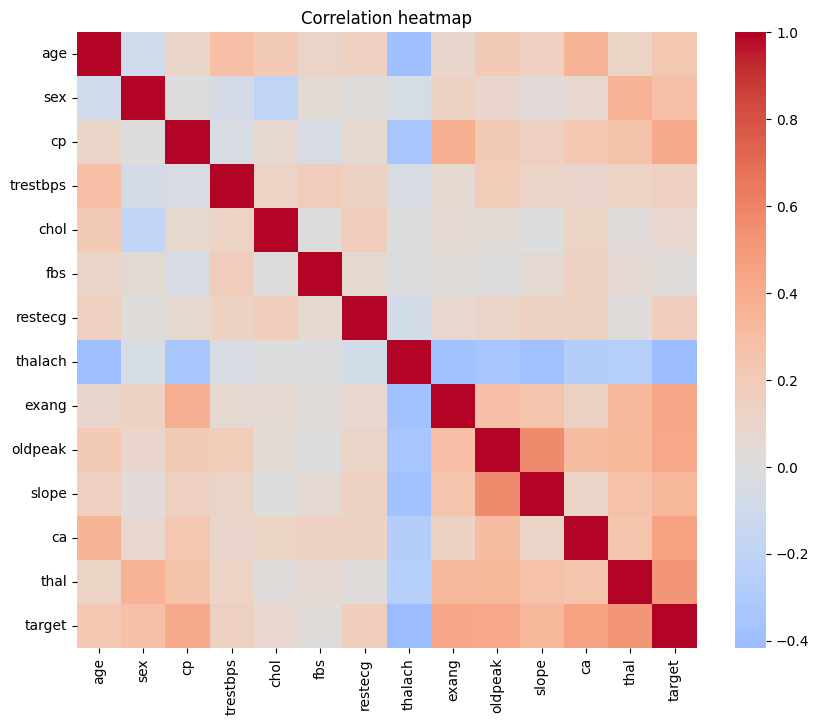

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation heatmap")
plt.show()
